In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import documents as docs
import comparisons 
import comparisonsmachine as machine 
import random
import time
import utils

start = time.time()

data_folder = "data"
results_folder = "results"
para_sep = "\n"

dd = comparisons.DuplicationDetection(thresh_jaccard = .5, thresh_same_sent = .9, thresh_same_doc = .25)

article_df = pd.read_pickle(os.path.join(data_folder, "article_df_20190601"))

display(article_df.head(2))
print("Setup time: %d seconds" % np.round(time.time() - start))

,id,publisher,scrape_time,on_homepage,url,title,text,fingerprint,event,doc,paywall
0,0,beforeitsnews.com,2019-06-01T04:51:24-04:00,True,https://beforeitsnews.com/v3/christian-news/20...,"47:2-3, 8-",First Option - Responsorial Psalm: Psalms 47:2...,"{'wordCounts': {'2': 1, '713350': 1, '14736': ...",NaN,None,0.0
1,1,thehindu.com,2019-06-01T08:44:25-04:00,True,https://www.thehindu.com/news/cities/Coimbator...,"In Gudalur, meat will come packed in Koova lea...","ePaper \n Just In \n In Gudalur, meat will com...","{'wordCounts': {'80836': 1, '3': 314, '11': 15...",NaN,None,0.0


Setup time: 3 seconds


In [17]:
article_df["text"][234]

"Explosion at Russian TNT plant injures 79 \n Updated \n 11:10\xa0am CDT, Saturday, June 1, 2019 \n MOSCOW (AP) — Russia's health ministry says 79 people have been injured in an explosion in a plant manufacturing TNT. \n The blast took place Saturday in Dzerzhinsk, 400 kilometers (250 miles) east of Moscow. An investigation is underway but the cause of the blast has not been determined. \n The ministry said 38 employees at the plant and 41 local residents sought treatment after the blast. It said 15 were hospitalized, one in serious condition. \n The blast broke windows in about 180 residential buildings near the plant, the state news agency Tass reported, citing city authorities. \n Dmitry Krasnov, deputy governor of the region that includes Dzerzhinsk, said earlier on state TV that two people were missing in the blast, but later said that information had not been confirmed."

In [18]:
n = 20
start = time.time()
#sample = random.sample(list(article_df["id"]), n)
sample = [i for i in range(n)]#f article_df.loc[i, "event"] == 1]
print("n articles: ", len(sample)) #, sample)
article_dict = dd.dict_by_ids(article_df, sample, para_sep = para_sep, parser = "spacy")
elapsed = round(time.time() - start, 2)
print("Time taken to run cell: %f s (%f s per document)" % (elapsed, elapsed/n))


n articles:  20
Time taken to run cell: 8.700000 s (0.435000 s per document)


In [19]:
sim_mat = dd.similarity_mat(article_dict)

0 of 20 rows completed, 0.00m elapsed


In [20]:
dd.cluster_articles(sim_mat)
dd.prop_unique_clusters()

0.95

In [21]:
comparer = machine.MultiComparisons()
article_dict = comparer.dict_by_ids(article_df, sample)
sim_mat_mp = comparer.run(article_dict)

Loaded documents via multiprocessing, 0.80m elapsed
0 of 190 comparisons made, 0.00m elapsed
Finished document comparisons via multiprocessing, 0.01m elapsed


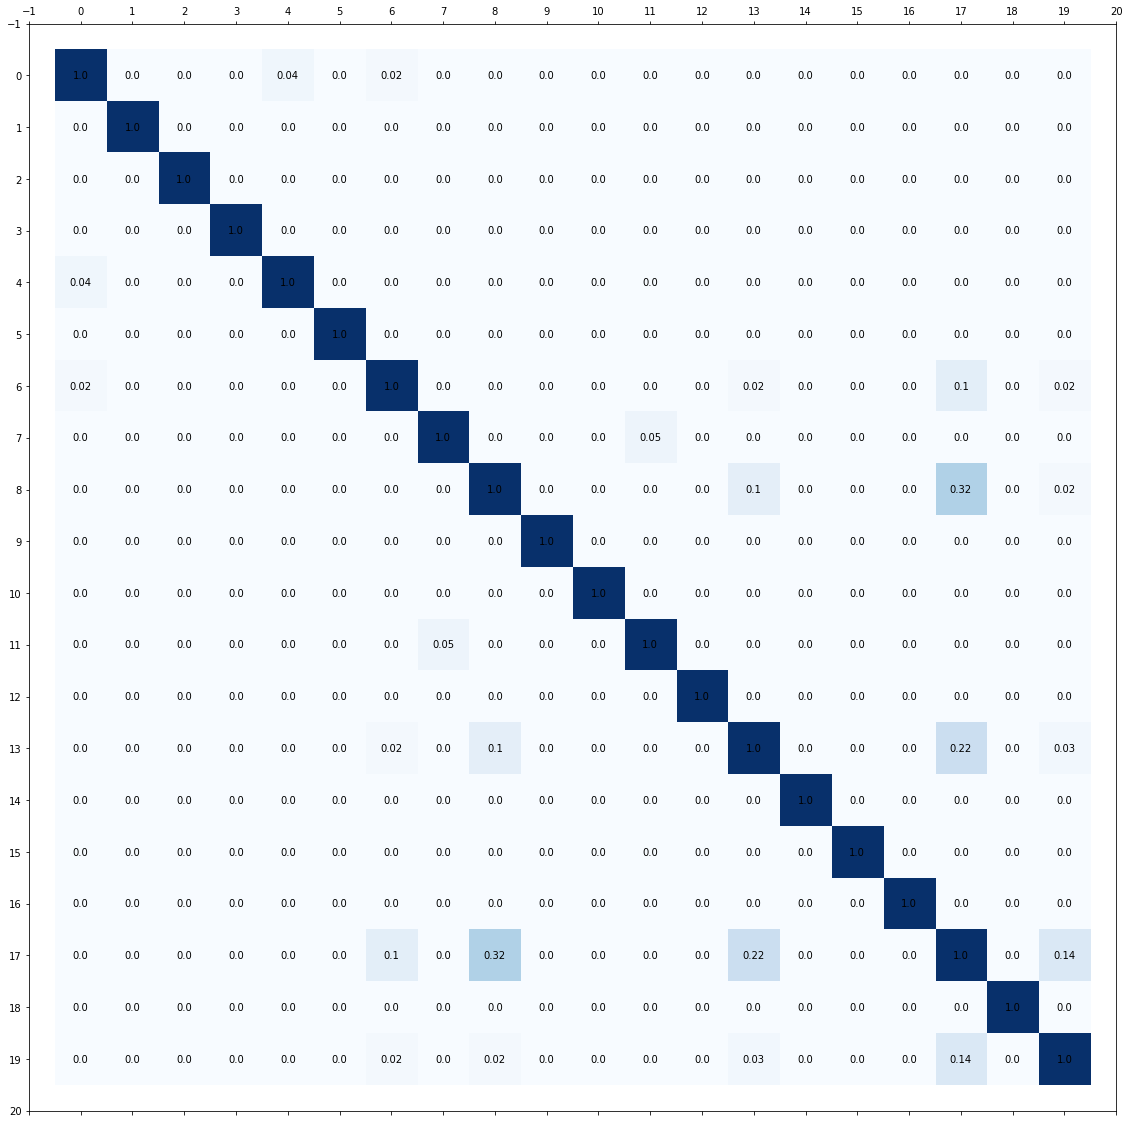

In [22]:
utils.display_mat(utils.subsetmat(sim_mat, [i for i in range(20)]))

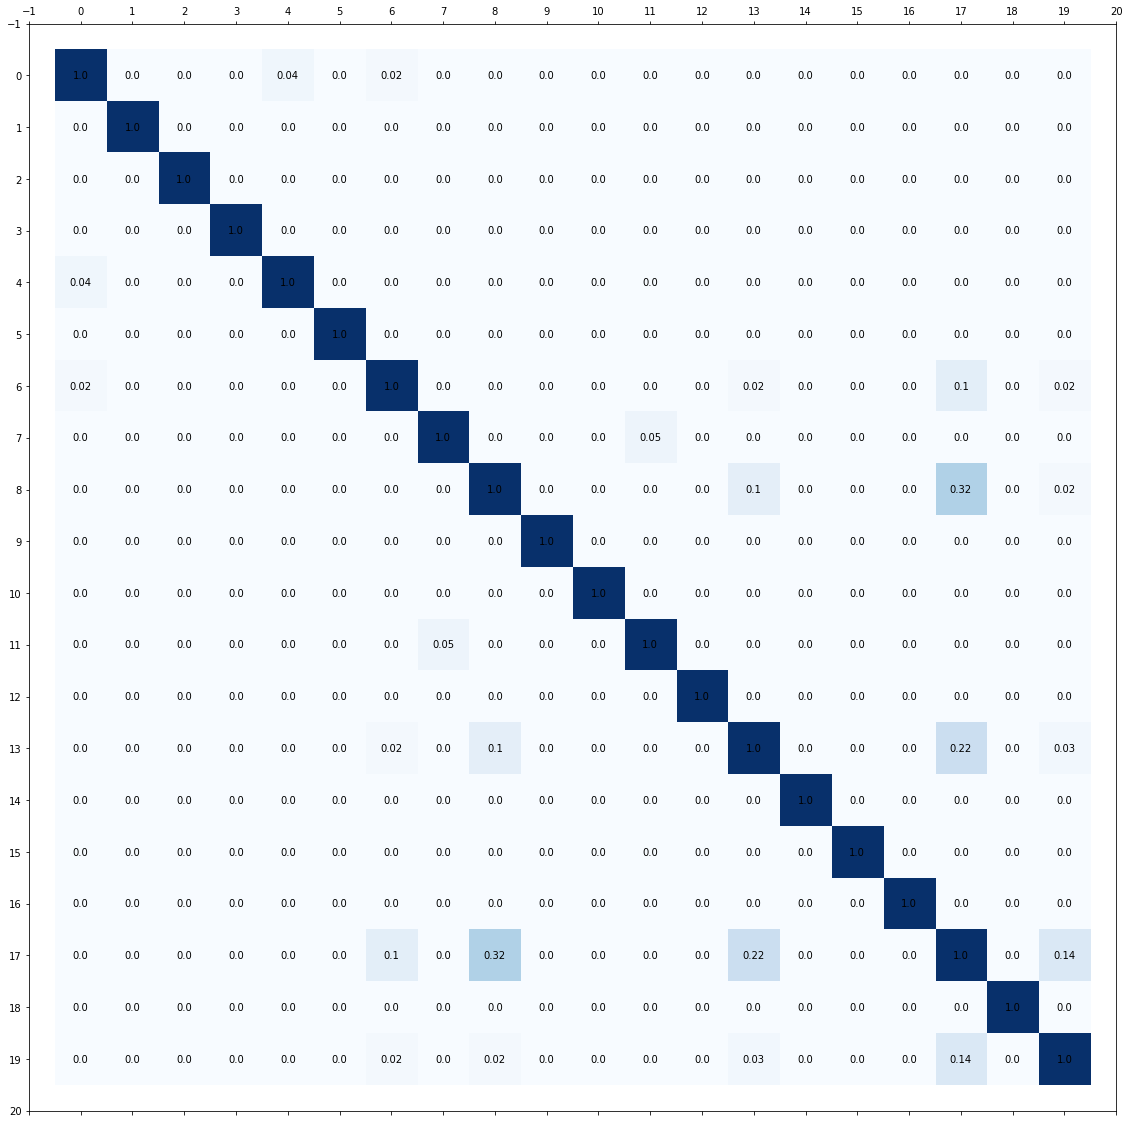

In [23]:
utils.display_mat(utils.subsetmat(sim_mat_mp, [i for i in range(20)]))

In [82]:
article_df = pd.read_pickle(os.path.join(data_folder, "article_df_20190601"))
sum(article_df["paywall"] == 0)/len(article_df) # 80% "good"

n = 100
sample = random.sample(list(article_df["id"]), n)
good_ids = [sample[i] for i in np.where(article_df.loc[sample, "paywall"] == 0)[0]]
bad_ids = [i for i in sample if i not in good_ids]

print("Random sample of %d articles from 2019/06/01; %d 'bad' articles found" % (n, len(bad_ids)))
print(">>> Bad article texts: \n")
for i in bad_ids:
    print("Article %d: \n" % (i), article_df["text"][i], "\n")
    
print(">>> Good article example texts: \n")
for i in random.sample(good_ids, 5):
    print("Article %d: \n" % (i), article_df["text"][i], "\n")

Random sample of 100 articles from 2019/06/01; 25 'bad' articles found
>>> Bad article texts: 

Article 94648: 
 If you previously used a social network to login to WRAL.com, click the “Forgot your password” link to reset your password. 
 Email 
 Man fatally shot in east Raleigh 
 Man fatally shot in east Raleigh 
 Tags: 
 By     Deborah Strange, WRAL digital journalist 
 Raleigh, N.C. — A man died after being shot Friday night, Raleigh police said. 
 Police responded to the 100 block of Farris Court, off of New Bern Avenue, around 11:50 p.m. to reports of a shooting. 
 Police said Saturday that the shooting victim, Corsean Holloway, 20, died of his injuries. 
 An investigation is ongoing. 
 Anyone with information can call 911 or Raleigh CrimeStoppers at 919-834-HELP. 
 More On This 

Article 62805: 
 Please enter a valid e-mail address 
 Password must be 6-20 characters 
 registration failed,Please try another Email 

Article 20870: 
 Troy vs. Troy Athens district soccer photo galler

 Fire Lt. Robert Smith, who was commanding Engine 3 during the response, said, “in just a matter of inches an injury may have occurred resulting in a very tragic story.” 

Article 15708: 
 Thank you for Reading! 
 Please log in, or sign up for a new account and purchase a subscription to continue reading. 
 (16301) 
 Today 
 A few passing clouds. A stray shower or thunderstorm is possible. Low 57F. Winds light and variable.. 
 Tonight 
 A few passing clouds. A stray shower or thunderstorm is possible. Low 57F. Winds light and variable. 
 Updated: May 31, 2019 @ 6:58 pm 
 Close 
 1 of 5 
 In this Wednesday, May 29, 2019 photo, actor Antonio Banderas poses for a photo during an interview, in Miami, Fla. Banderas is the winner of the Cannes Best Actor award for his most recent film, "Pain and Glory, an autobiographical film written and directed by Pedro Almodóvar. 
 Brynn Anderson 
 Save 
 MIAMI (AP) — Antonio Banderas waited 40 years to receive one of the most prestigious awards an actor

 With two international linemen moving on, the Argos announced the signing of Cardell Rawlings, a native of North Carolina who also plays on the defensive line. 

Article 82822: 
 Boston Police to begin camera rollout on Monday in Dorchester, South Boston 
 By Jennifer Smith, News Editor 
 May 31, 2019 
 Jennifer Smith, News Editor 
 Boston Police are rolling out the first phase of the city-wide body camera program on Monday, starting in Dorchester and South Boston police districts. 
 Officers in the C-6 and C-11 districts and the Youth Violence Strike Force started training with the cameras in early May . The phased program will begin in those districts on June 3, and 193 officers are expected to wear cameras as the roll out starts. Axon is the chosen camera vendor, police said in a post on Friday evening . 
 A new 12-page policy accompanies the rollout, laying out requirements including camera training for police, when recording will take place, appropriate uses for the footage, and 

 Funeral arrangements were incomplete. 



In [77]:
article_df = pd.read_pickle(os.path.join(data_folder, "article_df_20180715"))
sum(article_df["paywall"] == 0)/len(article_df) # 79% "good"

n = 100
sample = random.sample(list(article_df["id"]), n)
good_ids = [sample[i] for i in np.where(article_df.loc[sample, "paywall"] == 0)[0]]
bad_ids = [i for i in sample if i not in good_ids]

print("Random sample of %d articles from 2018/07/15; %d 'bad' articles found" % (n, len(bad_ids)))
print(">>> Bad article texts: \n")
for i in bad_ids:
    print("Article %d: \n" % (i), article_df["text"][i].replace("###", "\n"), "\n")
    
print(">>> Good article example texts: \n")
for i in random.sample(good_ids, 5):
    print("Article %d: \n" % (i), article_df["text"][i].replace("###", "\n"), "\n")

Random sample of 100 articles from 2018/07/15; 28 'bad' articles found
>>> Bad article texts: 

Article 32007: 
 This thread has been pulled. 
 Pulled on 07/15/2018 5:50:35 AM PDT by Admin Moderator, reason: 
 no link 

Article 31597: 
 Subscribe to discover fast, unlimited access. 
 Digital Basic 
 ✓ Unlimited access to billingsgazette.com and apps 
 ✓ No more surveys blocking articles 
 Save 30% with an annual subscription 
 ✓ Unlimited access to E-Edition 
 ✓ Unlimited access to the billingsgazette.com website and apps 
 ✓ No more surveys blocking articles 
 Save 
 Miles City Mavericks 6, Billings Halos 5 
 Jacksen Watts hit a two-run, walk-off double in the bottom of the seventh. Jared Bellows was 3-3, including a double, for the Mavs with two runs and an RBI. Cameron Muri also batted 3-3. 
 Miles City Mavericks 3, Riverton (Wyo.) Raiders 2 
 Miles City scored the eventual winning run on an error in the bottom of the sixth to break a 2-2 tie. Jess Bellows had an all-around good gam

 NDTV Beeps - your daily newsletter 

Article 106218: 
  Louis Post-Dispatch 
 Reader Rewards membership 
 Already a subscriber? Log in or Activate your account. 
 You are the owner of this article. 
 Don't have an account? Sign Up Today 
 My Account 
 Some clouds. A stray shower or thunderstorm is possible. Low 74F. Winds light and variable.. 
 Tonight 
 Some clouds. A stray shower or thunderstorm is possible. Low 74F. Winds light and variable. 
 Updated: July 15, 2018 @ 5:53 pm 
 At least 7 in Missouri sick from illness that may be linked to McDonald's salads 
 Save 
 At least seven people in Missouri have become ill after eating at McDonald’s restaurants, says the Missouri Department of Health and Senior Services. 
 The department and local public health agencies across Missouri are investigating cases of cyclosporiasis that appear to be linked to eating McDonald’s salads . 
 McDonald's puts brakes on selling its salads 
 The fast-food chain is pulling salads from 3,000 of its resta

 CONTACT: Unimoni 



In [75]:
sample = np.array(article_df.loc[article_df["event"] == 4, "id"])
random.sample(list(sample), 10)

[17742, 96275, 110876, 22056, 57866, 117738, 21131, 101448, 62956, 64947]

In [83]:
sum(article_df["paywall"] == 0)/len(article_df)

0.8011830560959149